<a href="https://colab.research.google.com/github/yesojeda/Diplomatura-BA-UDA/blob/main/Modulo%207/Trabajo_Final_7_OjedaYesica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

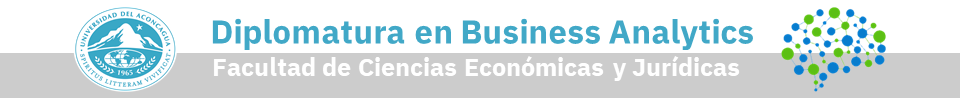

</center>

<center>
<font color="#41a8c7">
<h2><b>
Trabajo Final - Módulo 7 - Introducción a Python y Pandas

</font>
</center>

~~~
Ojeda Yésica
~~~

# Activar módulos necesarios

In [ ]:
import pandas as pd
import pandas_datareader as data
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import plotly.express as px
import plotly.graph_objects as go

# Obtener datos

In [ ]:
URL = "https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Modulo_07_Introduccion_a_Python/"
archivo = "Analisis_de_Facturas_de_Venta.csv"
datos = URL + archivo


In [ ]:
datos = pd.read_csv(datos)
datos

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
0,B-0001-00000102,Etigand S.A.,27/12/19,Factura,Consultoria Web,50.0,5785.1240,289256.20,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,21/12/19,Factura,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos
2,A-0001-00000231,Amazon Group,10/12/19,Factura,Parlantes para PC,30.0,1990.0000,59700.00,Pesos Argentinos
3,A-0001-00000230,Amazon Group,6/12/19,Factura,Mercaderia de Reventa,30.0,10358.0000,310740.00,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,20/11/19,Factura,Consultoria Web,50.0,6300.0000,315000.00,Pesos Argentinos
...,...,...,...,...,...,...,...,...,...
154,A-0001-00000128,Hernandez S.A.,31/1/18,Factura,Dise–o Web,5.0,6300.0000,31500.00,Pesos Argentinos
155,B-0001-00000069,Etigand S.A.,25/1/18,Factura,Impresora Multifuncion,8.0,3553.7190,28429.75,Pesos Argentinos
156,B-0001-00000069,Etigand S.A.,25/1/18,Factura,Monitores,8.0,3305.7851,26446.28,Pesos Argentinos
157,B-0001-00000068,Ferrari Hnos S.A.,1/1/18,Factura,Impresora Multifuncion,10.0,3553.7190,35537.19,Pesos Argentinos


# Crear un DataFrame

In [ ]:
dfdatos = datos #el dataframe va a ser llamado datos o dfdatos

## Visualizaciones del DataFrame

In [ ]:
dfdatos.head()

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
0,B-0001-00000102,Etigand S.A.,27/12/19,Factura,Consultoria Web,50.0,5785.1240,289256.20,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,21/12/19,Factura,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos
2,A-0001-00000231,Amazon Group,10/12/19,Factura,Parlantes para PC,30.0,1990.0000,59700.00,Pesos Argentinos
3,A-0001-00000230,Amazon Group,6/12/19,Factura,Mercaderia de Reventa,30.0,10358.0000,310740.00,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,20/11/19,Factura,Consultoria Web,50.0,6300.0000,315000.00,Pesos Argentinos


habría que ver si la fecha se puede cambiar a número, xq viene como palabra(object)

En un análisis exploratorio se debería de cambiar los tipos de datos necesarios en el tipo que los necesito. En el caso de fecha a n°, se debería cambiar xq sino lo toma como caracter y no me haría max o y mín o cálculos como quiero

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DOCUMENTO              159 non-null    object 
 1   ORGANIZACION           159 non-null    object 
 2   FECHA                  159 non-null    object 
 3   TIPOFACTURA            159 non-null    object 
 4   PRODUCTO               159 non-null    object 
 5   CANTIDAD               159 non-null    float64
 6   PRECIO                 159 non-null    float64
 7   IMPORTEMONTRANSACCION  159 non-null    float64
 8   MONEDA                 159 non-null    object 
dtypes: float64(3), object(6)
memory usage: 11.3+ KB


In [ ]:
datos["FECHA"] = pd.to_datetime(datos.FECHA)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DOCUMENTO              159 non-null    object        
 1   ORGANIZACION           159 non-null    object        
 2   FECHA                  159 non-null    datetime64[ns]
 3   TIPOFACTURA            159 non-null    object        
 4   PRODUCTO               159 non-null    object        
 5   CANTIDAD               159 non-null    float64       
 6   PRECIO                 159 non-null    float64       
 7   IMPORTEMONTRANSACCION  159 non-null    float64       
 8   MONEDA                 159 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 11.3+ KB


# Trabajando con el DataFrame

## Eliminando datos no disponibles y duplicados

In [ ]:
dfdatos.dropna

<bound method DataFrame.dropna of            DOCUMENTO  ...            MONEDA
0    B-0001-00000102  ...  Pesos Argentinos
1    B-0001-00000101  ...  Pesos Argentinos
2    A-0001-00000231  ...  Pesos Argentinos
3    A-0001-00000230  ...  Pesos Argentinos
4    A-0001-00000229  ...  Pesos Argentinos
..               ...  ...               ...
154  A-0001-00000128  ...  Pesos Argentinos
155  B-0001-00000069  ...  Pesos Argentinos
156  B-0001-00000069  ...  Pesos Argentinos
157  B-0001-00000068  ...  Pesos Argentinos
158  B-0001-00000068  ...  Pesos Argentinos

[159 rows x 9 columns]>

In [ ]:
dfdatos.drop_duplicates

<bound method DataFrame.drop_duplicates of            DOCUMENTO  ...            MONEDA
0    B-0001-00000102  ...  Pesos Argentinos
1    B-0001-00000101  ...  Pesos Argentinos
2    A-0001-00000231  ...  Pesos Argentinos
3    A-0001-00000230  ...  Pesos Argentinos
4    A-0001-00000229  ...  Pesos Argentinos
..               ...  ...               ...
154  A-0001-00000128  ...  Pesos Argentinos
155  B-0001-00000069  ...  Pesos Argentinos
156  B-0001-00000069  ...  Pesos Argentinos
157  B-0001-00000068  ...  Pesos Argentinos
158  B-0001-00000068  ...  Pesos Argentinos

[159 rows x 9 columns]>

In [ ]:
dfdatos.info

<bound method DataFrame.info of            DOCUMENTO  ...            MONEDA
0    B-0001-00000102  ...  Pesos Argentinos
1    B-0001-00000101  ...  Pesos Argentinos
2    A-0001-00000231  ...  Pesos Argentinos
3    A-0001-00000230  ...  Pesos Argentinos
4    A-0001-00000229  ...  Pesos Argentinos
..               ...  ...               ...
154  A-0001-00000128  ...  Pesos Argentinos
155  B-0001-00000069  ...  Pesos Argentinos
156  B-0001-00000069  ...  Pesos Argentinos
157  B-0001-00000068  ...  Pesos Argentinos
158  B-0001-00000068  ...  Pesos Argentinos

[159 rows x 9 columns]>

Se puede ver que no hay datos duplicados ni nulos, ya que hay 159 lineas x 9 columnas

Se recomienda datos.info en lugar de datos.dtypes,xq es más completo

## Insertando columnas

In [ ]:
datos.insert(1,column="Sarasa",value=datos.index.values)

In [ ]:
datos.head()

,DOCUMENTO,Sarasa,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
0,B-0001-00000102,0,Etigand S.A.,2019-12-27,Factura,Consultoria Web,50.0,5785.1240,289256.20,Pesos Argentinos
1,B-0001-00000101,1,Javier Moroni,2019-12-21,Factura,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos
2,A-0001-00000231,2,Amazon Group,2019-10-12,Factura,Parlantes para PC,30.0,1990.0000,59700.00,Pesos Argentinos
3,A-0001-00000230,3,Amazon Group,2019-06-12,Factura,Mercaderia de Reventa,30.0,10358.0000,310740.00,Pesos Argentinos
4,A-0001-00000229,4,Manganello S.R.L,2019-11-20,Factura,Consultoria Web,50.0,6300.0000,315000.00,Pesos Argentinos


Intenté crear una columna con el día, pero no lo logré. Otra columna que hubiera querido poner es en Factura el tipo, que debería haberlo extraido desde documento. Entiendo esto último lo puedo hacer en power query también, pero seguro hay un preprocesamiento/ ETL en python.

In [ ]:
datos.insert(5,column="Day",value=pd.DatetimeIndex(datos["Fecha"]).day_name()) # después debería de llamar al df para ver si quedó incluida esa nueva columna

KeyError: ignored

En la columna moneda busco cambiar "Pesos Argentinos" por "AR$"

In [ ]:
datos.insert(9, "Currency", "AR$", allow_duplicates=False)


## Renombrando columnas

In [ ]:
datos.rename(columns={"IMPORTEMONTRANSACCION":"TOTAL"}, inplace=True) #renombro la clumna de importe transacción

In [ ]:
datos.rename(columns={"Sarasa":"Num orden"}, inplace=True)

In [ ]:
datos.rename(columns={"Currency":"DIVISA"}, inplace=True)

In [ ]:
datos.head()

,DOCUMENTO,Num orden,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,TOTAL,DIVISA,MONEDA
0,B-0001-00000102,0,Etigand S.A.,2019-12-27,Factura,Consultoria Web,50.0,5785.1240,289256.20,AR$,Pesos Argentinos
1,B-0001-00000101,1,Javier Moroni,2019-12-21,Factura,Honorarios,1.0,99586.7769,99586.78,AR$,Pesos Argentinos
2,A-0001-00000231,2,Amazon Group,2019-10-12,Factura,Parlantes para PC,30.0,1990.0000,59700.00,AR$,Pesos Argentinos
3,A-0001-00000230,3,Amazon Group,2019-06-12,Factura,Mercaderia de Reventa,30.0,10358.0000,310740.00,AR$,Pesos Argentinos
4,A-0001-00000229,4,Manganello S.R.L,2019-11-20,Factura,Consultoria Web,50.0,6300.0000,315000.00,AR$,Pesos Argentinos


## Reindexando index

El index originalmente va del 0 al 158 por el rango



In [ ]:
Sólo traigo filas 1,2,4 y columnas 2 y 0 (está llamando por posición de filas y columnas. Se podría hacer por rango con un 2 puntos entre. Si pongo [] es una lista)

SyntaxError: ignored

In [ ]:
datos.iloc[[1,2,4],[2,0]]

,ORGANIZACION,DOCUMENTO
1,Javier Moroni,B-0001-00000101
2,Amazon Group,A-0001-00000231
4,Manganello S.R.L,A-0001-00000229


In [ ]:
datos.reset_index(drop=True, inplace=True)

In [ ]:
datos

,DOCUMENTO,Num orden,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,TOTAL,DIVISA,MONEDA
0,B-0001-00000102,0,Etigand S.A.,2019-12-27,Factura,Consultoria Web,50.0,5785.1240,289256.20,AR$,Pesos Argentinos
1,B-0001-00000101,1,Javier Moroni,2019-12-21,Factura,Honorarios,1.0,99586.7769,99586.78,AR$,Pesos Argentinos
2,A-0001-00000231,2,Amazon Group,2019-10-12,Factura,Parlantes para PC,30.0,1990.0000,59700.00,AR$,Pesos Argentinos
3,A-0001-00000230,3,Amazon Group,2019-06-12,Factura,Mercaderia de Reventa,30.0,10358.0000,310740.00,AR$,Pesos Argentinos
4,A-0001-00000229,4,Manganello S.R.L,2019-11-20,Factura,Consultoria Web,50.0,6300.0000,315000.00,AR$,Pesos Argentinos
...,...,...,...,...,...,...,...,...,...,...,...
154,A-0001-00000128,154,Hernandez S.A.,2018-01-31,Factura,Dise–o Web,5.0,6300.0000,31500.00,AR$,Pesos Argentinos
155,B-0001-00000069,155,Etigand S.A.,2018-01-25,Factura,Impresora Multifuncion,8.0,3553.7190,28429.75,AR$,Pesos Argentinos
156,B-0001-00000069,156,Etigand S.A.,2018-01-25,Factura,Monitores,8.0,3305.7851,26446.28,AR$,Pesos Argentinos
157,B-0001-00000068,157,Ferrari Hnos S.A.,2018-01-01,Factura,Impresora Multifuncion,10.0,3553.7190,35537.19,AR$,Pesos Argentinos


# Grabando

## Grabar el DataFrame como un archivo SCV

In [ ]:
dfdatos.to_csv("datos.csv")

In [ ]:
# Se carga el módulo para utilizar Drive
from google.colab import drive
# Se monta el drive
drive.mount('/drive', force_remount=True)
# Se copia el archivo a Google Drive (debe ponerse siempre "My Drive", aunque esté como "Mi dispositivo")
datos.to_csv('/drive/My Drive/archivo_datos.csv')

Mounted at /drive


# Gráficos

## Desarrollar gráficos del DataFrame

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


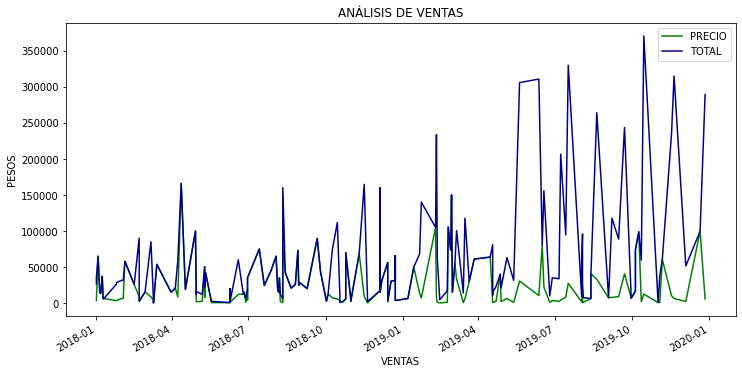

In [ ]:
datos.plot("FECHA",["PRECIO","TOTAL"], 
          kind="line", 
          figsize=(12,6), 
          color=["GREEN","darkblue"], 
          title="ANÁLISIS DE VENTAS", 
          ylabel = "PESOS",
          xlabel = "VENTAS")

In [ ]:
agrupacion_clientes = datos.groupby("ORGANIZACION").sum()

In [ ]:
agrupacion_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORGANIZACION  20 non-null     object 
 1   Num orden     20 non-null     int64  
 2   CANTIDAD      20 non-null     float64
 3   PRECIO        20 non-null     float64
 4   TOTAL         20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [ ]:
agrupacion_clientes.insert(0,column="ORGANIZACION",value = agrupacion_clientes.index.values)
agrupacion_clientes.reset_index(drop=True, inplace=True)

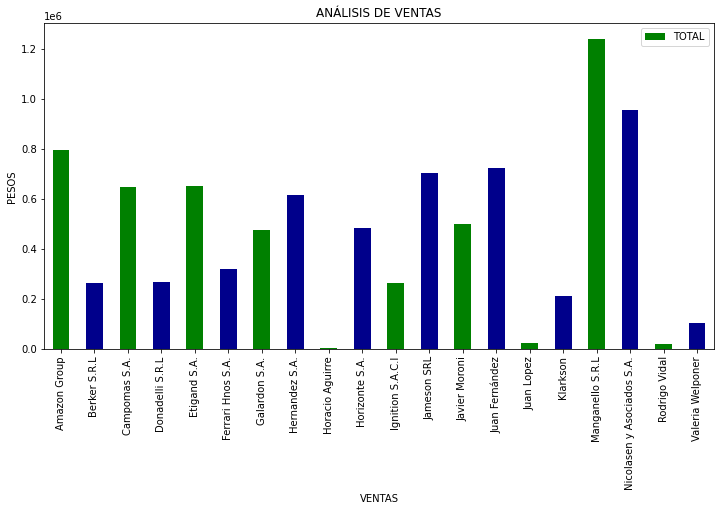

In [ ]:
agrupacion_clientes.plot("ORGANIZACION","TOTAL",
kind="bar",
figsize=(12,6),
color=["green","darkblue"],
title="ANÁLISIS DE VENTAS",
ylabel = "PESOS",
xlabel = "VENTAS")

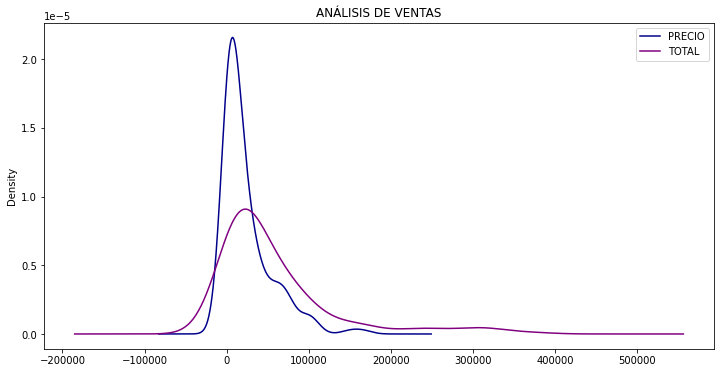

In [ ]:
datos.plot("FECHA",["PRECIO","TOTAL"],
kind="kde",
figsize=(12,6),
color=["darkblue","purple"],
title="ANÁLISIS DE VENTAS",
ylabel = "PESOS",
xlabel = "VENTAS")